In [135]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [136]:
#Reading the whale returns CSV
whale_returns_csv = Path('Whale_Returns.csv')

In [137]:
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format = True, parse_dates = True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [138]:
#Count Nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [139]:
#Drop Nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [140]:
#Reading algorithmic returns
algo_returns_csv = Path('algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [141]:
#Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [142]:
#Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [143]:
#Read sp500 returns
sp500_history_csv = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [144]:
#Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [145]:
#Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [146]:
#Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [147]:
#Drop Nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [148]:
#Rename Column
sp500_returns.rename(columns={'Close' : 'S&P 500'}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [149]:
#Combine Whale, Algorithmic, and S&P 500 Returns
all_portfolios = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


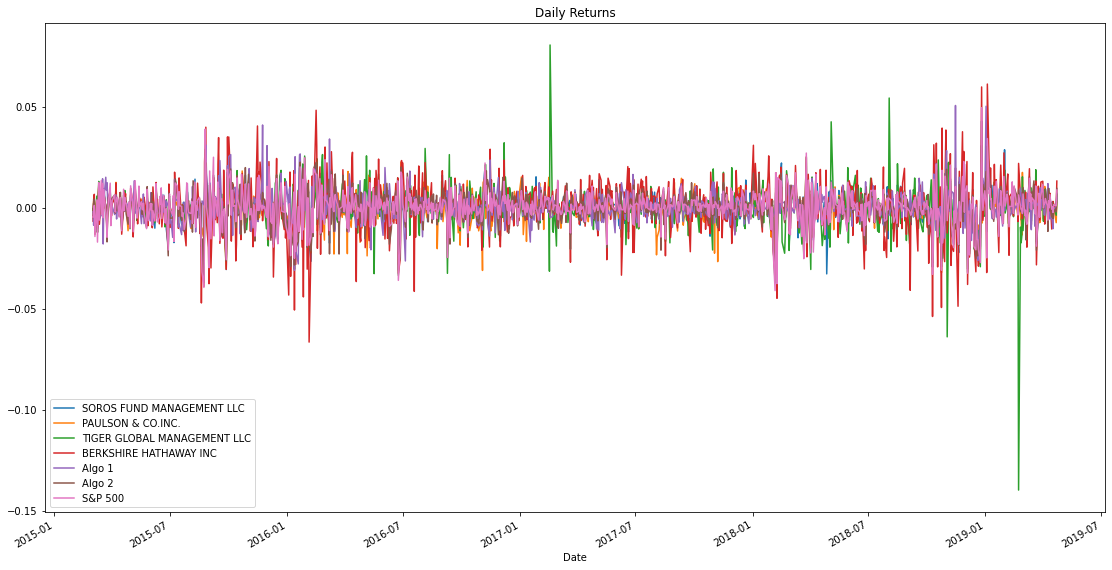

In [150]:
#Calculate and Plot the daily returns and cumulative returns
all_portfolios.plot(figsize=(19,10),title='Daily Returns')

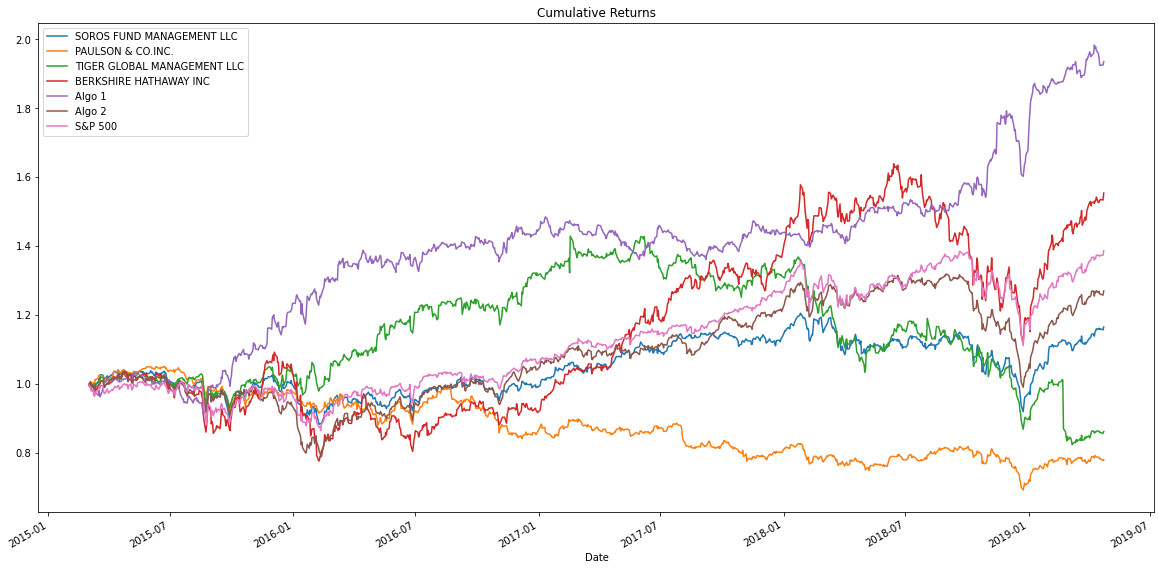

In [151]:
#Algo 1 clearly performing the best with the S&P500 in the middle of the group. Paulson & C. INC. actually losing money falling from 1.0 to about 0.8.
cumulative_returns =(1 + all_portfolios).cumprod()
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

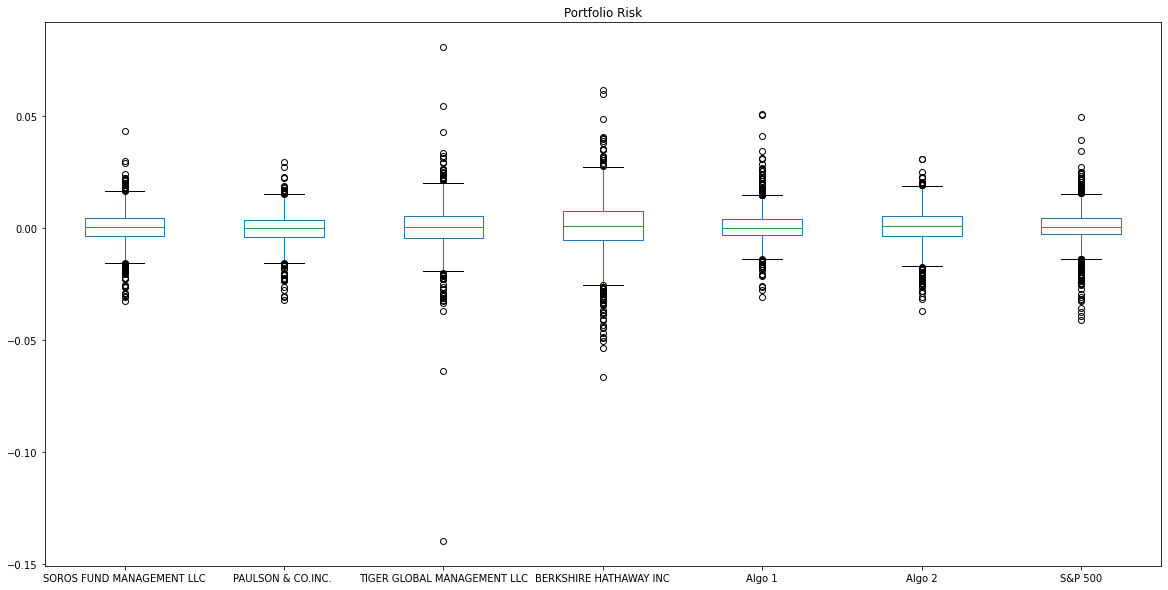

In [152]:
#Box Plot to visually show risk
#The Daily volatility of an investment in Berkshire Hathaway is much greater than that of Algorithmic Portfolio 1 or the S&P 500 overall
all_portfolios.plot.box(figsize=(20,10), title='Portfolio Risk')

In [153]:
#Daily Standard Deviations
#Daily standard deviation of Tiger Global Management LLC and Berkshire Hathaway INC are the highest.
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [154]:
#Compare the standard deviations of the entire portfolio to the S&P 500. We find that only Tiger and Berkshire have higher risk than the market as a whole.
sp500_risk = all_portfolios["S&P 500"].std()
all_portfolios.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [155]:
#Calculate the annualized standard deviation (252 trading days)
all_portfolios.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

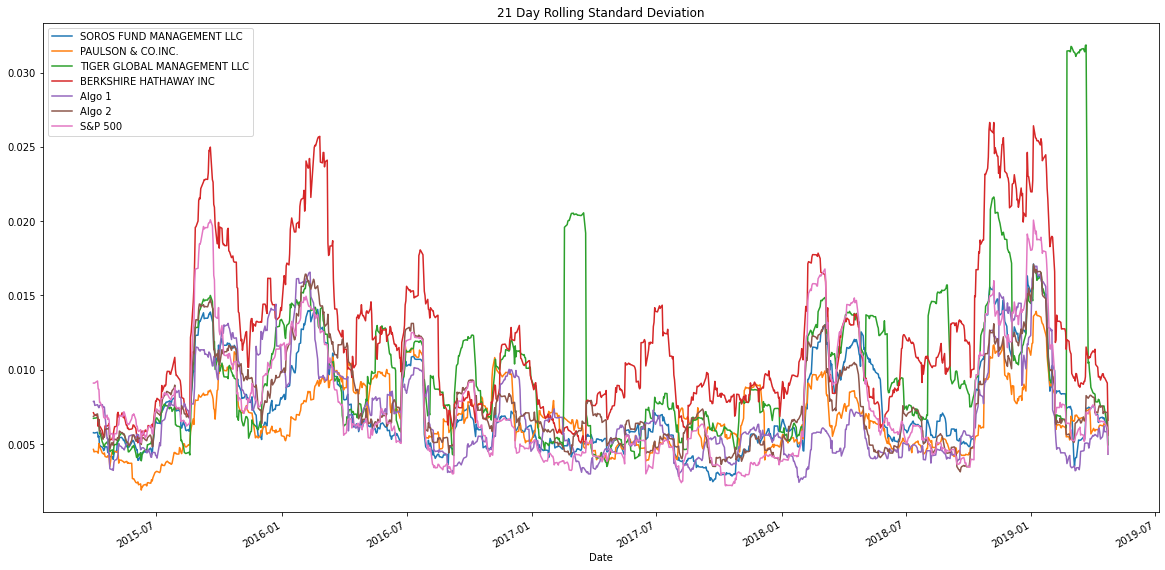

In [156]:
#Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
#Note: Risk of all portfolios seem to have increased toward the end of 2018 and beginning of 2019.
all_portfolios.rolling(window=21).std().plot(figsize=(20, 10), title='21 Day Rolling Standard Deviation')

In [157]:
#Correlation
#Lighter colors denote the stronger correlation
#Algo 2 and Soros Fund Management LLC have the strongest correlation with the market index. So their returns would not be much different than if you invested in a S&P 500 ETF.
#Algo 1 has the lowest correlation with all the Hedge Funds and the S&P 500, suggesting the most potential for diversification benefits
corr_df = all_portfolios.corr()
corr_df.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


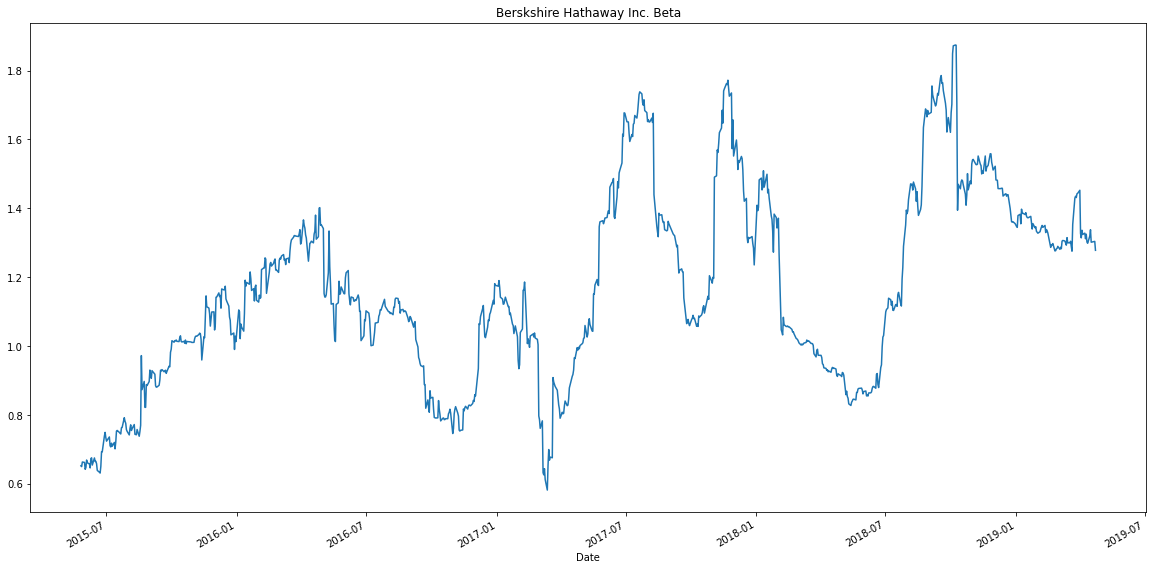

In [158]:
#Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios['S&P 500'])
variance = all_portfolios["S&P 500"].rolling(60).var()
(covariance/variance).plot(figsize=(20,10), title="Berskshire Hathaway Inc. Beta")

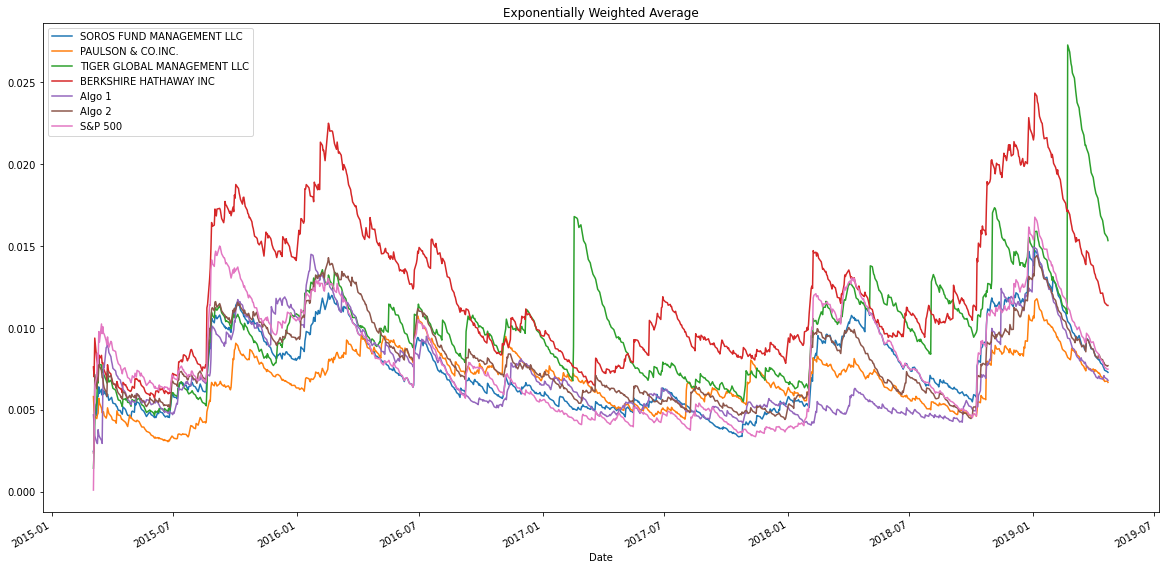

In [159]:
# Calculate a rolling window using the exponentially weighted moving average. 
all_portfolios.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [160]:
#Annualize Sharpe Ratios
#Paulson & Co.INC. do not and Tiger Global Management LLC do not compensate for the level of risk that they take.
#Only portfolio to outperform the benchmark is Algo 1
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

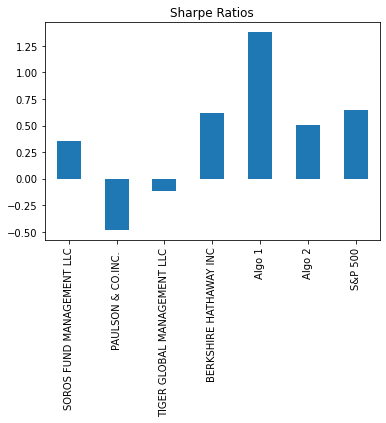

In [161]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [162]:
#Custom Portfolio - Chosen stocks (Google, Apple, and Costco)

#Reading the Google Csv
google_historical_csv = Path('goog_historical.csv')
google_historical = pd.read_csv(
    google_historical_csv, index_col = 'Trade DATE', infer_datetime_format=True, parse_dates=True)
google__historical = google_historical.sort_index()
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [163]:
#Reading the Apple Csv
apple_historical_csv = Path('aapl_historical.csv')
apple_historical = pd.read_csv(
    apple_historical_csv, index_col = 'Trade DATE', infer_datetime_format=True, parse_dates=True)
apple__historical = apple_historical.sort_index()
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [164]:
#Reading the Costco Csv
costco_historical_csv = Path('cost_historical.csv')
costco_historical = pd.read_csv(
    costco_historical_csv, index_col = 'Trade DATE', infer_datetime_format=True, parse_dates=True)
costco__historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [165]:
#Combine Google, Apple, and Costco returns
all_stocks = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [166]:
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [167]:
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [168]:
daily_returns = portfolio.pct_change().dropna()
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [169]:
#Caculating the weighted returns for the portfolio assuming an equal number of shares for each stock
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [170]:
#Joining my portfolio to the data frame that contains all of the portfolio returns
all_portfolios["Custom"] = portfolio_returns
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [171]:
#Only comapre dates where the custom portfolio has dates
all_portfolios.dropna(inplace=True)

In [172]:
#Rerunning the performance and risk analysis with your portfolio to see how it compares to the others
#Custom is generally risky which makes sense because of the two tech stocks I have chosen
all_portfolios.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

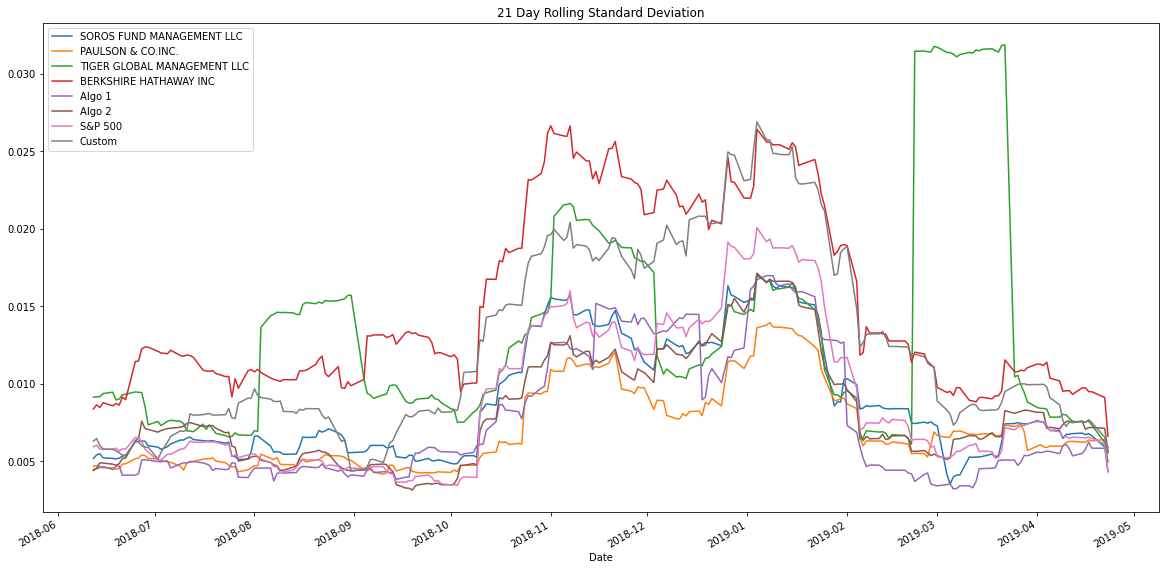

In [173]:
#Rolling statistics
all_portfolios.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [174]:
#Annualized Sharpe Ratios
#Custom portfolio has done well. It has outperformed, on a risk adjusted basis, the benchmark index. 
#Note: Still lower than Algo 1
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

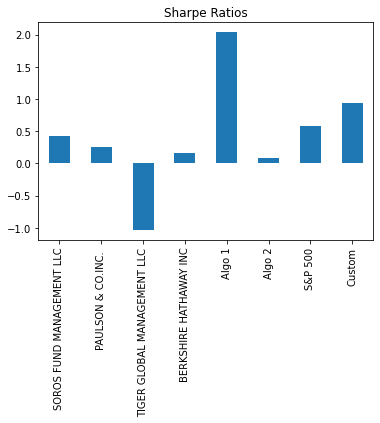

In [175]:
#Visualize the Sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [176]:
#Correlation Analysis to determine which stocks are correlated
#Custom portfolio has a fairly high correlation with the S&P 500
#Compared to Algo 1, Custom Portfolio does not provide as much diversification potential
df = all_portfolios.corr()
df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


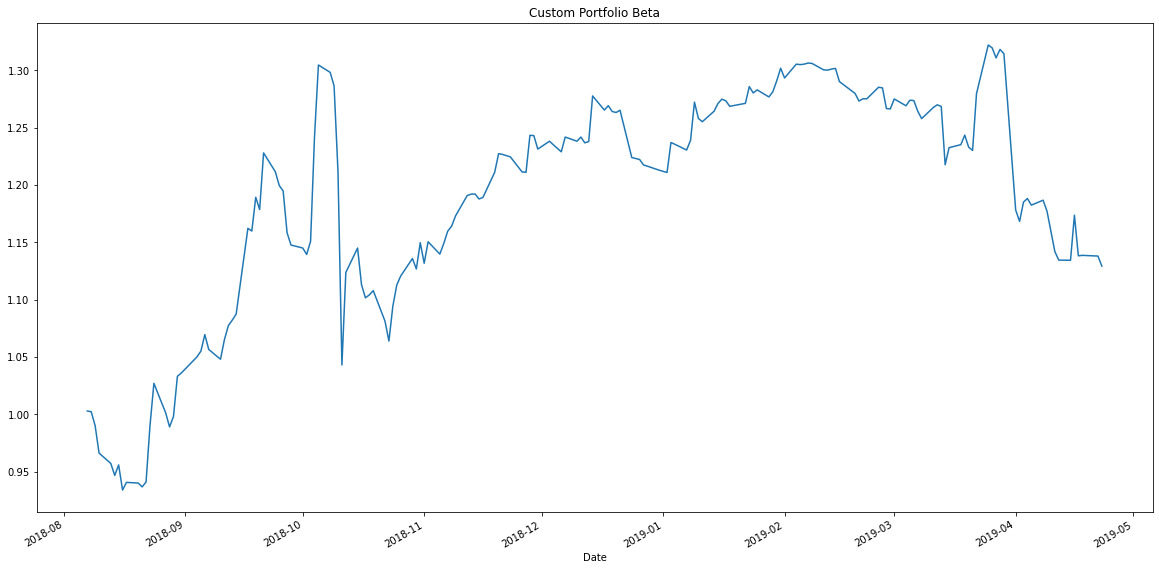

In [177]:
# Beta of Custom Portfolio
covariance = all_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = all_portfolios["S&P 500"].rolling(60).var()
(covariance / variance).plot(figsize=(20, 10), title="Custom Portfolio Beta")